# 1. Importing libraries and data

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# importing data
path = 'C:/Users/santi/HiDrive/users/santina/02_Data Analytics/Bootcamp/06_Advanced-Analytics/02_Data/Clean Data'
df = pd.read_csv(os.path.join(path, 'suicide-rates-cleaned.csv'))

# 2. Data cleaning

In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [5]:
df.shape

(27820, 11)

In [6]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [15]:
df = df.drop(['country-year'], axis=1)

In [16]:
df.shape

(27820, 10)

In [17]:
#encoding the categorical features with LabelEncoder

from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age', 'sex', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    df[column] = le.fit_transform(df[column])

In [18]:
#creating a copy of dataset for statistical test

stat_df = df.copy()
stat_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,3620833,2.96,"63,067,077,179",2309,2
27816,100,29,0,5,9,348465,2.58,"63,067,077,179",2309,5
27817,100,29,1,3,60,2762158,2.17,"63,067,077,179",2309,3
27818,100,29,0,3,44,2631600,1.67,"63,067,077,179",2309,3


In [19]:
df.dtypes

country                 int64
year                    int64
sex                     int64
age                     int64
suicides_no             int64
population              int64
suicides/100k pop     float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation              int64
dtype: object

In [27]:
# Converting the column 'gdp_for_year' to float from object

df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',','').astype(float)

# 3. Explore data

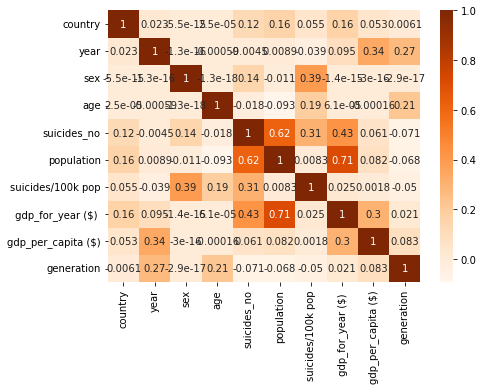

In [55]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='Oranges')
plt.show()

The heatmap shows that the suicide cases are more in male population. 


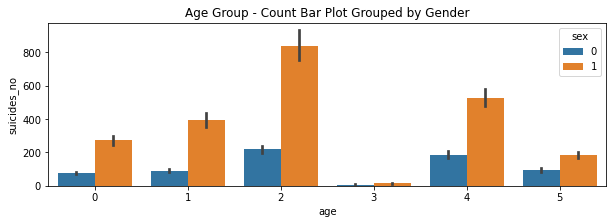

In [62]:
#Age Group - Count Bar Plot Grouped by Gender

plt.figure(figsize=(10,3))
sns.barplot(x = "age", y = "suicides_no", hue = "sex", data = df)
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()



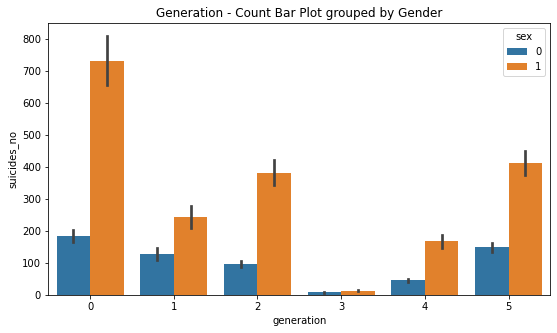

In [65]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicides_no", hue = "sex", data = df)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()



From the above two bar plots, it is clear that men commit suicide considerably more than women irrespective of age group and generation they belong to. I, therefore, would like to test this relationship.

# 4. Data prep for regression analysis

In [46]:
# separating & assinging features and target columns X & y; reshape NumPy array
y = df['suicides_no'].values.reshape(-1,1)
X = df[('sex')].values.reshape(-1,1)
X.shape, y.shape

((27820, 1), (27820, 1))

In [47]:
# Splitting the dataset into train and test sets: 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22256, 1), (5564, 1))

# 5. Regression analysis

In [36]:
# create a regression object 
regression = LinearRegression() #this is the regression object I will fit onto the training set

In [76]:
# fit the regression object to the training set
regression.fit(X, y)

LinearRegression()

In [38]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

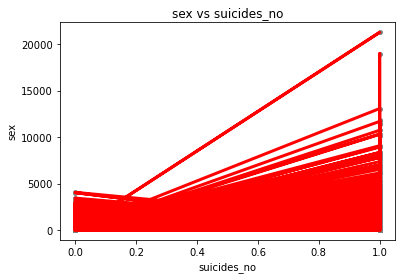

In [67]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('sex vs suicides_no')
plot_test.xlabel('suicides_no')
plot_test.ylabel('sex')
plot_test.show()

The regression line appear to fit the data for sex vs. suicide_no very well.

In [69]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [70]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 3.98145179e-15 -1.14713640e-14 -6.46419216e-13  2.54126688e-13
  1.00000000e+00 -1.65352318e-18 -3.50779475e-22 -1.28738770e-15
  1.53312437e-15]
Mean squared error:  2.5371798726529334e-19
R2 score:  1.0


In [71]:
y_predicted

array([2.40000000e+01, 3.40000000e+01, 7.00000000e+00, ...,
       4.36000000e+02, 1.60189136e-10, 1.31000000e+02])

In [72]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,24,2.400000e+01
1,34,3.400000e+01
2,7,7.000000e+00
3,2269,2.269000e+03
4,8,8.000000e+00
5,0,1.797764e-10
6,45,4.500000e+01
7,111,1.110000e+02
8,14,1.400000e+01
9,4,4.000000e+00


In [77]:
# Predict.

y_predicted = regression.predict(X) # This is predicting X_train!

In [78]:
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

In [79]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[260.92020129]]
Mean squared error:  796641.3580046525
R2 score:  0.02091759807068816


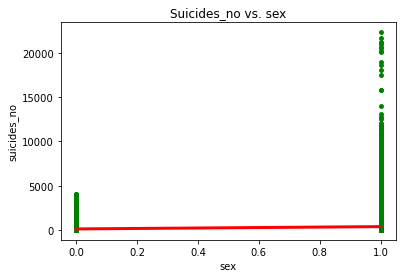

In [82]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X, y, color='green', s = 15)
plot_test.plot(X, y_predicted, color='red', linewidth =3)
plot_test.title('Suicides_no vs. sex')
plot_test.xlabel('sex')
plot_test.ylabel('suicides_no')
plot_test.show()

The scale of the x-axis is not perfect and therefore the regression line does not appear to show high correlations - especially because there are only cases in 0 (women) and 1 (men). Yet, it is obvious that there are way more suicides among men than womenLinear regressions are perfect to check correlations between two variables.